In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error,confusion_matrix, classification_report, accuracy_score


##### Task 1: Linear Regression Task:
###### - Input: User’s past 7 days ke daily workout duration (minutes) aur calories burned data.
###### - Output: Predict karo ke next week average calories burned kitni hogi.

In [81]:
data = {
    "Workout_Duration": [30,45,60,90],
    "Calories_Burned" : [200, 300, 450, 600]
}

data = pd.DataFrame(data)
data.to_csv("fitlife_dataset.csv")

In [82]:
df = pd.read_csv("fitlife_dataset.csv")

df

,Unnamed: 0,Workout_Duration,Calories_Burned
0,0,30,200
1,1,45,300
2,2,60,450
3,3,90,600


In [83]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,Workout_Duration,Calories_Burned
0,30,200
1,45,300
2,60,450
3,90,600


In [84]:
model = LinearRegression()

In [85]:
x = df[["Workout_Duration"]]
y = df["Calories_Burned"]

In [86]:
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
pred = model.predict(x)
pred

array([210.        , 311.42857143, 412.85714286, 615.71428571])

In [90]:
model.predict([[75]])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([514.28571429])

In [91]:
r2 = r2_score(y, pred)
MSE = mean_squared_error(y, pred)
MAE = mean_absolute_error(y,pred)

print(f"R2 Score : {r2}")
print(f"MSE : {MSE}")

print(f"MAE : {MAE}")

R2 Score : 0.9797862001943635
MSE : 464.28571428571365
MAE : 18.571428571428555


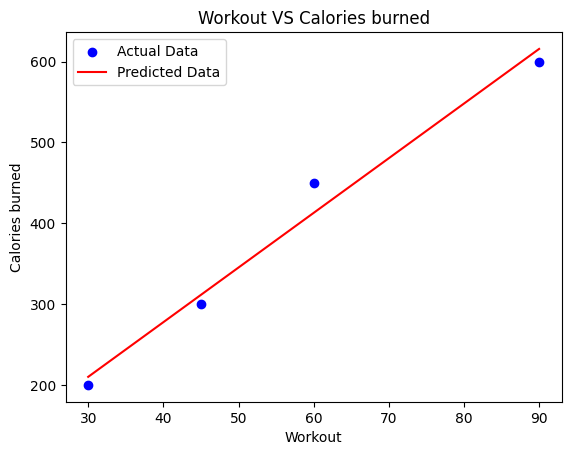

In [92]:
plt.scatter(x,y , color="blue", label="Actual Data")
plt.plot(x, pred, color="red", label="Predicted Data")
plt.title("Workout VS Calories burned")
plt.xlabel("Workout")
plt.ylabel("Calories burned")
plt.legend()
plt.show()

#### Task 2 : Logistic Regression Task:
##### - Input: Age, BMI, Avg Calories Burned, and Daily Workout Time
##### - Output: Predict karo ke user fitness goal achieve karega (1) ya nahi karega (0)

In [93]:
data2 = {
    "Age": [22,28,25,35],
    "BMI": [23,30,25,32],
    "Avg_Calories": [300,180,400,150],
    "Workout_Time": [45,20,60,15],
    "Goal_Achieved": [1,0,1,0],
}

data2 = pd.DataFrame(data2)
data2.to_csv("fitlife_dataset_2.csv")

In [95]:
df = pd.read_csv("fitlife_dataset_2.csv")
df

,Unnamed: 0,Age,BMI,Avg_Calories,Workout_Time,Goal_Achieved
0,0,22,23,300,45,1
1,1,28,30,180,20,0
2,2,25,25,400,60,1
3,3,35,32,150,15,0


In [96]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,Age,BMI,Avg_Calories,Workout_Time,Goal_Achieved
0,22,23,300,45,1
1,28,30,180,20,0
2,25,25,400,60,1
3,35,32,150,15,0


In [98]:
X = df[["Age", "BMI", "Avg_Calories", "Workout_Time"]]
Y = df["Goal_Achieved"]

In [99]:
model2 = LogisticRegression()

In [100]:
model2.fit(X,Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [112]:
newUser = pd.DataFrame({
    "Age": [26],
    "BMI": [27],
    "Avg_Calories": [350],
    "Workout_Time": [40]
})
prediction = model2.predict(newUser)
probability = model2.predict_proba(newUser)
print(f"Prediction (1 = Achieve Goal, 0 = Not Achieve): {prediction[0]} : {'Achieve Goal' if prediction[0]==1 else 'Not achieve' } ")
print("Probability [Not Achieve, Achieve]:", probability[0])

Prediction (1 = Achieve Goal, 0 = Not Achieve): 1 : Achieve Goal 
Probability [Not Achieve, Achieve]: [4.17605823e-06 9.99995824e-01]


Confusion Matrix:
 [[2 0]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Accuracy: 1.0


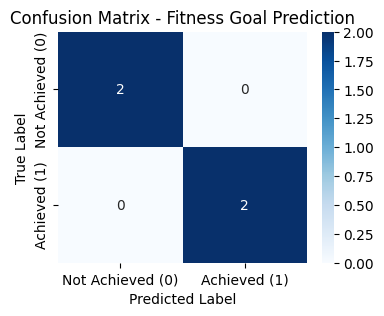

In [120]:
y_pred = model2.predict(X)
cm = confusion_matrix(Y, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(Y, y_pred))
print("Accuracy:", accuracy_score(Y, y_pred))

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Achieved (0)", "Achieved (1)"], yticklabels=["Not Achieved (0)", "Achieved (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Fitness Goal Prediction")
plt.show()